In [1]:

import sqlalchemy
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect,func

In [2]:
#connect to hawaii sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
#The tables in the database
Base.classes.keys()

['measurement', 'station']

In [6]:
#Reference to classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Precipitation Analysis

In [7]:
#Create a session
session = Session(engine)

In [8]:
Inspector = inspect(engine)
#columns in measurement table
m_columns = Inspector.get_columns("measurement")
for column in m_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
for row in session.query(Measurement.date,Measurement.prcp).filter_by(prcp = 2).limit(15):
    print(row)

('2011-06-03', 2.0)
('2012-03-04', 2.0)
('2013-12-19', 2.0)
('2014-01-29', 2.0)
('2015-10-27', 2.0)
('2017-03-01', 2.0)


### Design a query to retrieve the last 12 months of precipitation data.

In [25]:
#Latest date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [26]:
last_date = last_date[0]

In [13]:
import datetime as dt
from datetime import datetime

In [14]:
#One year before last date in data base
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

In [17]:
print(year_ago)

2016-08-23


In [31]:
#Query to retrieve last 12 months of precipitation data
query12mth = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > year_ago).filter(Measurement.date < last_date).order_by(Measurement.date).all()

### Select only the date and prcp values.

In [87]:
query12mth

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

### Load the query results into a Pandas DataFrame and set the index to the date column.

In [40]:
prcp_df = pd.DataFrame(query12mth)

In [41]:
prcp_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [42]:
prcp_df = prcp_df.set_index("date")

### Sort the DataFrame values by date.

In [43]:
prcp_df = prcp_df.sort_values("date")

In [92]:
prcp_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


### Plot the results using the DataFrame plot method.

In [46]:
import matplotlib.pylab as plt
import numpy as np

In [47]:
%matplotlib notebook

In [49]:
# y axis values
prcp_data = list(prcp_df["prcp"])

In [50]:
# Set x axis 
x_axis = np.arange(1,len(prcp_data)+1,1)

<IPython.core.display.Javascript object>


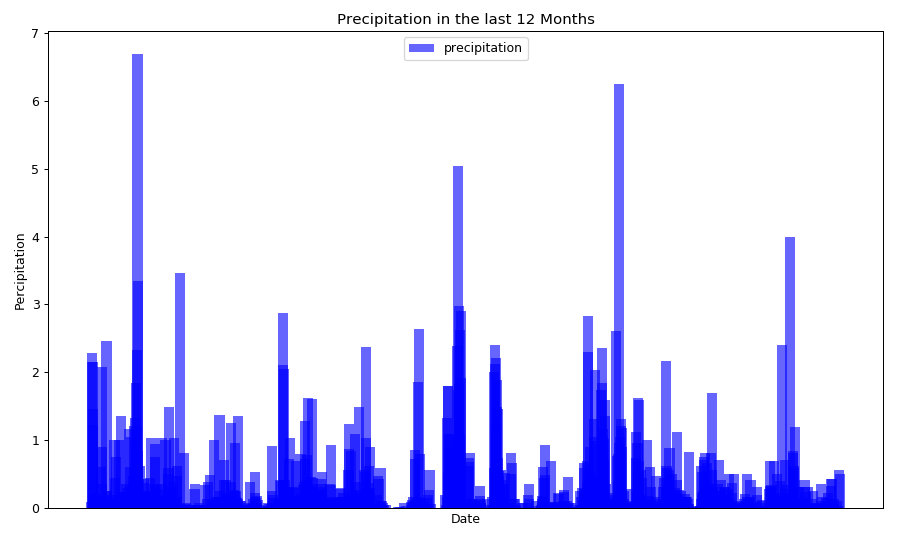

<BarContainer object of 2219 artists>

In [51]:
plt.figure(figsize=(10,6))
plt.bar(x_axis,prcp_data,color = 'b',width = 30,alpha = 0.6,label = "precipitation")

In [52]:
#axis labels
plt.xlabel("Date")
plt.ylabel("Percipitation")

Text(90.74999738401837, 0.5, 'Percipitation')

In [53]:
#legend
plt.legend(loc = "upper center")

In [54]:
#Remove ticks and tick values
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)

In [55]:
plt.title("Precipitation in the last 12 Months")

Text(0.5, 1.0, 'Precipitation in the last 12 Months')

In [56]:
plt.tight_layout()

In [58]:
plt.savefig("precipitation.png")

### Use Pandas to print the summary statistics for the precipitation data.

In [59]:
prcp_df.describe()

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [61]:
#columns in station table
s_columns = Inspector.get_columns("station")
for column in s_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


### Design a query to calculate the total number of stations.

In [62]:
station_count = session.query(Station.station).count()
station_count

9

In [66]:
engine.execute("SELECT * FROM station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [67]:
engine.execute("SELECT * FROM measurement").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

### Design a query to find the most active stations.

In [105]:
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### Which station has the highest number of observations?

In [70]:
#Station with highest numbor of observations = 
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()[0]

'USC00519281'

### Design a query to retrieve the last 12 months of temperature observation data (tobs).

In [71]:
#last 12 monts of temp observation data for station with most observations
temp = session.query(Measurement.date,Measurement.tobs).\
filter(Measurement.date >year_ago).filter(Measurement.date <last_date).\
filter(Measurement.station == 'USC00519281').all()


### Plot the results as a histogram with bins=12.

In [72]:
temp_df = pd.DataFrame(temp)
temp_df.head()

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


In [73]:
%matplotlib notebook

<IPython.core.display.Javascript object>


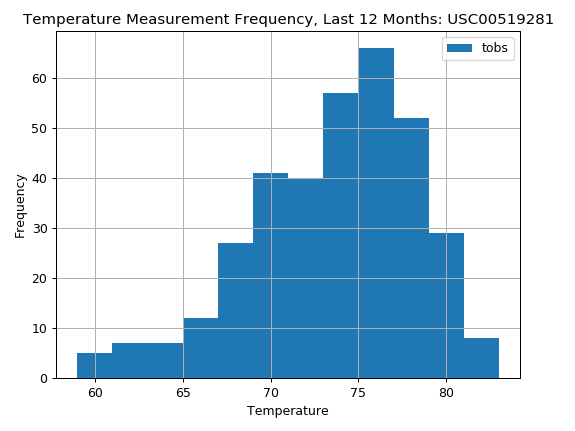

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

In [79]:
plt.hist(temp_df["tobs"],bins = 12,label="tobs")

In [80]:
plt.grid()

In [81]:
plt.ylabel("Frequency")
plt.xlabel("Temperature")

Text(0.5, 20.769999105400508, 'Temperature')

In [82]:
plt.legend(loc="upper right")

In [84]:
plt.title("Temperature Measurement Frequency, Last 12 Months: USC00519281")

Text(0.5, 1.0, 'Temperature Measurement Frequency, Last 12 Months: USC00519281')

In [85]:
plt.tight_layout()

In [86]:
plt.savefig("tempHistogram.png")

# Step 2 - Climate App

In [103]:
#Create dictionary from precipitation dataframe
prcp_df.dropna().to_dict()["prcp"]

{'2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.02,
 '2016-08-27': 0.12,
 '2016-08-28': 2.07,
 '2016-08-29': 0.0,
 '2016-08-30': 0.05,
 '2016-08-31': 0.1,
 '2016-09-01': 0.0,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.74,
 '2016-09-05': 0.18,
 '2016-09-06': 0.04,
 '2016-09-07': 0.23,
 '2016-09-08': 0.15,
 '2016-09-09': 0.29,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 0.0,
 '2016-09-13': 0.32,
 '2016-09-14': 6.7,
 '2016-09-15': 0.12,
 '2016-09-16': 0.07,
 '2016-09-17': 0.23,
 '2016-09-18': 0.0,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 0.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.15,
 '2016-09-24': 0.0,
 '2016-09-25': 0.04,
 '2016-09-26': 0.06,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 0.04,
 '2016-09-30': 0.38,
 '2016-10-01': 0.14,
 '2016-10-02': 0.61,
 '2016-10-03': 0.04,
 '2016-10-04': 0.0,
 '2016-10-05': 0.81,
 '2016-10-06': 0.0,
 '2016-10-07': 0.01,
 '2016-10-08': 0.0,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 '2016-

In [113]:
#Create dictionary from temperature data frame
temp_df.dropna().set_index("date").to_dict()["tobs"]

{'2016-08-24': 77.0,
 '2016-08-25': 80.0,
 '2016-08-26': 80.0,
 '2016-08-27': 75.0,
 '2016-08-28': 73.0,
 '2016-08-29': 78.0,
 '2016-08-30': 77.0,
 '2016-08-31': 78.0,
 '2016-09-01': 80.0,
 '2016-09-02': 80.0,
 '2016-09-03': 78.0,
 '2016-09-04': 78.0,
 '2016-09-05': 78.0,
 '2016-09-06': 73.0,
 '2016-09-07': 74.0,
 '2016-09-08': 80.0,
 '2016-09-09': 79.0,
 '2016-09-10': 77.0,
 '2016-09-11': 80.0,
 '2016-09-12': 76.0,
 '2016-09-13': 79.0,
 '2016-09-14': 75.0,
 '2016-09-15': 79.0,
 '2016-09-16': 78.0,
 '2016-09-17': 79.0,
 '2016-09-18': 78.0,
 '2016-09-19': 78.0,
 '2016-09-20': 76.0,
 '2016-09-21': 74.0,
 '2016-09-22': 77.0,
 '2016-09-23': 78.0,
 '2016-09-24': 79.0,
 '2016-09-25': 79.0,
 '2016-09-26': 77.0,
 '2016-09-27': 80.0,
 '2016-09-28': 78.0,
 '2016-09-29': 78.0,
 '2016-09-30': 78.0,
 '2016-10-01': 77.0,
 '2016-10-02': 79.0,
 '2016-10-03': 79.0,
 '2016-10-04': 79.0,
 '2016-10-05': 79.0,
 '2016-10-06': 75.0,
 '2016-10-07': 76.0,
 '2016-10-08': 73.0,
 '2016-10-09': 72.0,
 '2016-10-10'

In [133]:
date_list = list(temp_df.dropna()["date"])

In [134]:
temp_list = list(temp_df.dropna()["tobs"])

In [135]:
temp_dict = {
    "date":date_list,
    "temperature":temp_list
}

In [136]:
len(date_list)

351

In [137]:
len(temp_list)

351

In [138]:
temp_dict

{'date': ['2016-08-24',
  '2016-08-25',
  '2016-08-26',
  '2016-08-27',
  '2016-08-28',
  '2016-08-29',
  '2016-08-30',
  '2016-08-31',
  '2016-09-01',
  '2016-09-02',
  '2016-09-03',
  '2016-09-04',
  '2016-09-05',
  '2016-09-06',
  '2016-09-07',
  '2016-09-08',
  '2016-09-09',
  '2016-09-10',
  '2016-09-11',
  '2016-09-12',
  '2016-09-13',
  '2016-09-14',
  '2016-09-15',
  '2016-09-16',
  '2016-09-17',
  '2016-09-18',
  '2016-09-19',
  '2016-09-20',
  '2016-09-21',
  '2016-09-22',
  '2016-09-23',
  '2016-09-24',
  '2016-09-25',
  '2016-09-26',
  '2016-09-27',
  '2016-09-28',
  '2016-09-29',
  '2016-09-30',
  '2016-10-01',
  '2016-10-02',
  '2016-10-03',
  '2016-10-04',
  '2016-10-05',
  '2016-10-06',
  '2016-10-07',
  '2016-10-08',
  '2016-10-09',
  '2016-10-10',
  '2016-10-11',
  '2016-10-12',
  '2016-10-13',
  '2016-10-14',
  '2016-10-15',
  '2016-10-16',
  '2016-10-17',
  '2016-10-18',
  '2016-10-19',
  '2016-10-20',
  '2016-10-21',
  '2016-10-22',
  '2016-10-23',
  '2016-10-24',


In [127]:
len(temp_dict["date"])

351